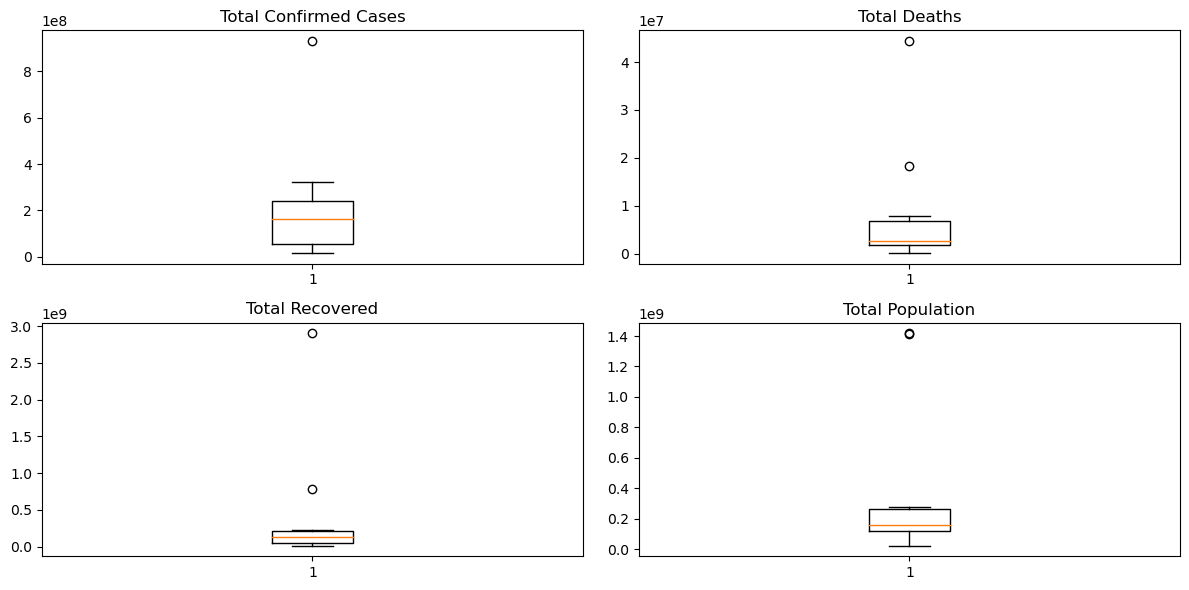

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'Country': ['China', 'India', 'Bangladesh', 'Pakistan', 'Russia', 'Indonesia', 'Japan', 'Philippines', 'Sri Lanka', 'Afghanistan'],
    'Total Confirmed Cases': [43839055, 322676808, 161494811, 165572396, 930548849, 265186050, 89378076, 164420468, 15676007, 17026442],
    'Total Deaths': [2138884, 44424723, 2369239, 3537569, 18363719, 7770329, 1580914, 3089116, 91579, 669075],
    'Total Recovered': [39612750, 2900589824, 132982094, 146019913, 790705716, 226416174, 78335782, 142849090, 13707143, 13464399],
    'Total Population': [1412175000, 1417173173, 171186372, 235824862, 143555736, 275501339, 125124989, 115559009, 22181000, 43082337]
}

df = pd.DataFrame(data)

# Visualizing potential outliers using box plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.boxplot(df['Total Confirmed Cases'])
plt.title('Total Confirmed Cases')
plt.subplot(2, 2, 2)
plt.boxplot(df['Total Deaths'])
plt.title('Total Deaths')
plt.subplot(2, 2, 3)
plt.boxplot(df['Total Recovered'])
plt.title('Total Recovered')
plt.subplot(2, 2, 4)
plt.boxplot(df['Total Population'])
plt.title('Total Population')
plt.tight_layout()
plt.show()


Severity Ranking:
     Country  Predicted Severity
1      India           63.151693
0  Sri Lanka            2.819092


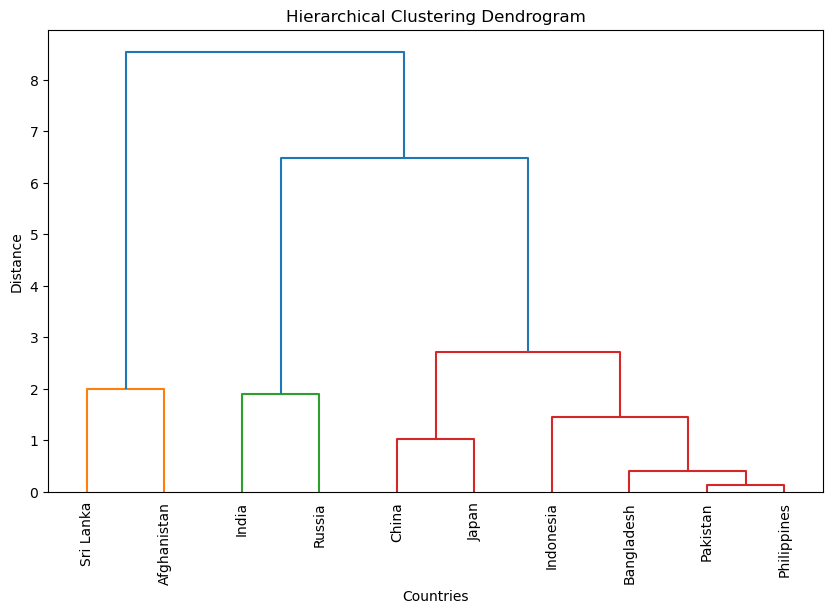

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'Country': ['China', 'India', 'Bangladesh', 'Pakistan', 'Russia', 'Indonesia', 'Japan', 'Philippines', 'Sri Lanka', 'Afghanistan'],
    'Total Confirmed Cases': [43839055, 322676808, 161494811, 165572396, 930548849, 265186050, 89378076, 164420468, 15676007, 17026442],
    'Total Deaths': [2138884, 44424723, 2369239, 3537569, 18363719, 7770329, 1580914, 3089116, 91579, 669075],
    'Total Recovered': [39612750, 2900589824, 132982094, 146019913, 790705716, 226416174, 78335782, 142849090, 13707143, 13464399]
}

df = pd.DataFrame(data)

# Handling outliers with Winsorization
from scipy.stats.mstats import winsorize

# Winsorize extreme values in each feature
df['Total Confirmed Cases'] = winsorize(df['Total Confirmed Cases'], limits=[0.05, 0.05])
df['Total Deaths'] = winsorize(df['Total Deaths'], limits=[0.05, 0.05])
df['Total Recovered'] = winsorize(df['Total Recovered'], limits=[0.05, 0.05])

# Log Transformation
df['Total Confirmed Cases'] = np.log1p(df['Total Confirmed Cases'])
df['Total Deaths'] = np.log1p(df['Total Deaths'])
df['Total Recovered'] = np.log1p(df['Total Recovered'])

# Label Encoding for Country
label_encoder = LabelEncoder()
df['Country_Code'] = label_encoder.fit_transform(df['Country'])

# Separate features and target
X = df.drop(columns=['Country', 'Country_Code'])
y = df['Country_Code']

# Feature Scaling using Robust Scaler followed by Normalization
robust_scaler = RobustScaler()
normalized_features = robust_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(normalized_features)

# Machine Learning Model
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Multi-Criteria Decision Making (MCDM)
severity_ranking = pd.DataFrame({'Country': label_encoder.inverse_transform(y_test), 'Predicted Severity': predictions})
severity_ranking = severity_ranking.sort_values(by='Predicted Severity', ascending=False)

print("Severity Ranking:")
print(severity_ranking)

# Dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
dendrogram(Z, labels=df['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.show()

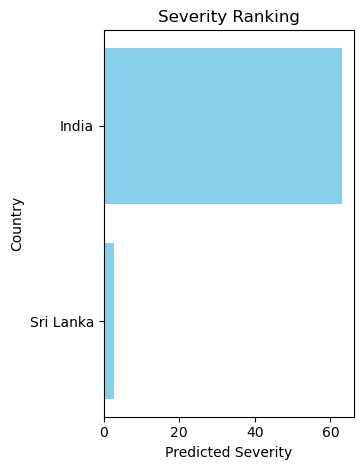

In [8]:
plt.subplot(1, 2, 2)
plt.barh(severity_ranking['Country'], severity_ranking['Predicted Severity'], color='skyblue')
plt.xlabel('Predicted Severity')
plt.ylabel('Country')
plt.title('Severity Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to display highest severity at the top
plt.tight_layout()

Severity Ranking:
     Country  Predicted Severity
1      India           63.151693
0  Sri Lanka            2.819092


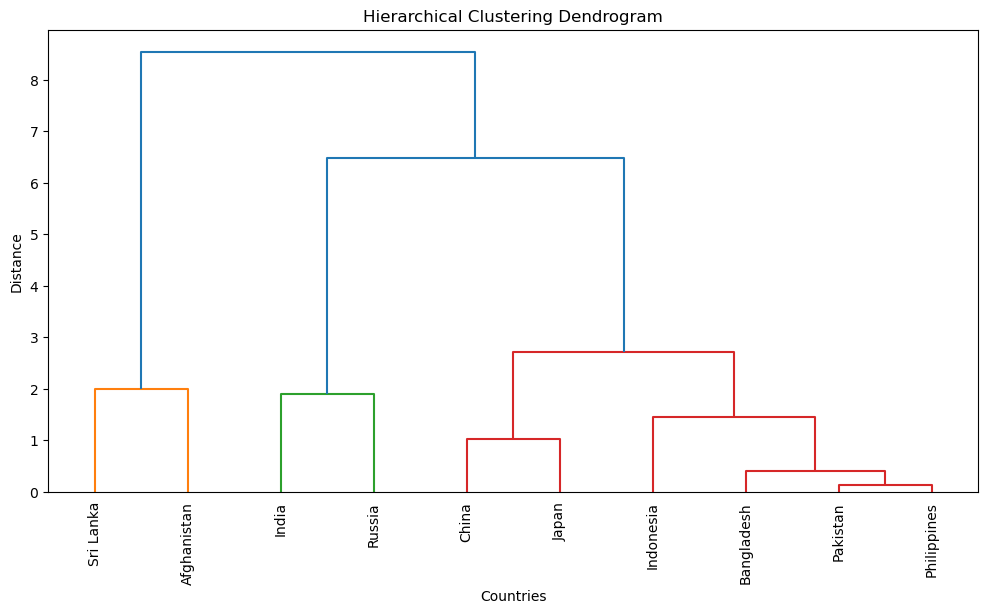

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'Country': ['China', 'India', 'Bangladesh', 'Pakistan', 'Russia', 'Indonesia', 'Japan', 'Philippines', 'Sri Lanka', 'Afghanistan'],
    'Total Confirmed Cases': [43839055, 322676808, 161494811, 165572396, 930548849, 265186050, 89378076, 164420468, 15676007, 17026442],
    'Total Deaths': [2138884, 44424723, 2369239, 3537569, 18363719, 7770329, 1580914, 3089116, 91579, 669075],
    'Total Recovered': [39612750, 2900589824, 132982094, 146019913, 790705716, 226416174, 78335782, 142849090, 13707143, 13464399]
}

df = pd.DataFrame(data)

# Handling outliers with Winsorization
from scipy.stats.mstats import winsorize

# Winsorize extreme values in each feature
df['Total Confirmed Cases'] = winsorize(df['Total Confirmed Cases'], limits=[0.05, 0.05])
df['Total Deaths'] = winsorize(df['Total Deaths'], limits=[0.05, 0.05])
df['Total Recovered'] = winsorize(df['Total Recovered'], limits=[0.05, 0.05])

# Log Transformation
df['Total Confirmed Cases'] = np.log1p(df['Total Confirmed Cases'])
df['Total Deaths'] = np.log1p(df['Total Deaths'])
df['Total Recovered'] = np.log1p(df['Total Recovered'])

# Label Encoding for Country
label_encoder = LabelEncoder()
df['Country_Code'] = label_encoder.fit_transform(df['Country'])

# Separate features and target
X = df.drop(columns=['Country', 'Country_Code'])
y = df['Country_Code']

# Feature Scaling using Robust Scaler followed by Normalization
robust_scaler = RobustScaler()
normalized_features = robust_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(normalized_features)

# Machine Learning Model
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Multi-Criteria Decision Making (MCDM)
severity_ranking = pd.DataFrame({'Country': label_encoder.inverse_transform(y_test), 'Predicted Severity': predictions})
severity_ranking = severity_ranking.sort_values(by='Predicted Severity', ascending=False)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

print("Severity Ranking:")
print(severity_ranking)

# Dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(12,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
dendrogram(Z, labels=df['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.savefig('dendrogram.png')  # Save the dendrogram as an image
plt.show()